Импортируем библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time

from collections import Counter

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, GenericUnivariateSelect

In [3]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, cross_validate, KFold, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
import data_processing as dprcs
import task_read as tsk
import dataset_open as dst
import classification as clsf

Задаем константы

In [5]:
rnd = 71 # Зафиксируем random_state

In [6]:
file_name = 'mechanical-analysis.data.txt'

Читаем задачу

In [7]:
tsk.task_describe()

В качестве испытания представлен набор данных Mechanical Data Set. В архиве находятся:
Файл с набором данных.
Файл с записями из набора данных, не включенными в основной набор (обычно - не используются).
Файл с описанием набора данных (английский язык, можно воспользоваться любым удобным переводчиком).
Набор данных описывает результаты контроля состояния электро-механического оборудования (насосов) с применением методов вибрационной диагностики. В качестве выходного параметра рассматривается состояние, характеризующееся либо полной исправностью, либо одной или несколькими неисправностями (подробно – в файле с описанием). Таким образом – решается задача классификации.
Необходимо:
Ознакомиться с описанием набора данных, дать краткую интерпретацию смыслового содержания. Пояснить атрибуты (входные параметры) и возможные классы состояний диагностируемых объектов.
Ознакомиться с файлом с данными, дать краткую характеристику структуре представления данных в нем.
Сформировать (разработать) и к

И описание датасета

In [8]:
tsk.dataset_describe();

1. Title of Database: Mechanical analysis
-- diagnosis of faults in electro-machanical devices from vibration
measurements

2. Sources:
(a) Original owners of database:

F. Bergadano, A. Giordana, L. Saitta
University of Torino, Italy
Corso Svizzera 185, Torino - tel. (39) 11 7712002
e-mail: bergadan@itoinfo.bitnet

F. Bracadori, D. De Marchi
Sogesta, Localita' Crocicchio, Urbino, Italy

(b) Donor of database: Enichem (Eni), Ravenna through Sogesta (Eni), Urbino.
(c) Date received: June 1990
3. Past Usage:
(a) F. Bergadano, A. Giordana, L. Saitta, F. Brancadori, D. De Marchi:
"Integrated Learning in a real Domain"
Proc. VII ML Conference, Austin TX, 1990 (pages 322-329)
(b) Indication of what attribute(s) were being predicted: class.
(c) Indication of study's results: results are described in the paper.
4. Relevant Information Paragraph:
-- F. Bergadano supplied this database.  Each instance contains many
components, each of which has 8 attributes.  Different instances
in this database

In [9]:
task = tsk.dataset_describe(lang="ru");
task

1. Название базы данных: Механический анализ
-- диагностика неисправностей электромеханических устройств от вибрации
измерения

2. Источники:
(a) Первоначальные владельцы базы данных:

Ф. Бергадано, А. Джордана, Л. Сайтта
Туринский университет, Италия
Corso Svizzera 185, Турин - тел. (39) 11 7712002
электронная почта: bergadan@itoinfo.bitnet

Ф. Бракадори, Д. Де Марчи
Sogesta, Localita' Crocicchio, Урбино, Италия

(б) Донор базы данных: Энихем (Эни), Равенна через Согесту (Эни), Урбино.
с) Дата получения: июнь 1990 года.
3. Использование в прошлом:
а) Ф. Бергадано, А. Джордана, Л. Сайтта, Ф. Бранкадори, Д. Де Марчи:
«Интегрированное обучение в реальной области»
проц. VII Конференция ML, Остин, Техас, 1990 г. (стр. 322-329)
(b) Указание того, какой атрибут(ы) прогнозировался: класс.
(c) Указание результатов исследования: результаты описаны в документе.
4. Соответствующий информационный пункт:
-- Ф. Бергадано предоставил эту базу данных. Каждый экземпляр содержит множество
компонентов, к

Подготовим данные

In [10]:
def dataset_prepare(file_name):
    with open(f"Mechanical DataSet/{file_name}", "r") as file:
        file_text = list()
        for line in file: file_text.append(line.strip())
    file_text = dst.dataset_instance(file_text)
    pd.DataFrame(file_text).to_csv(file_name, header=None, index=False)
dataset_prepare(file_name)

Прочитаем имеющиеся данные

In [11]:
def dataset_open(file_name, sep=',', header='infer'):
    return pd.read_csv(file_name, header=header, sep=sep)
data = dataset_open(file_name, sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,3,0,120.00,21.0,ao,1000,1
1,1,1,1,3,0,55.00,7.5,aa,1000,1
2,1,1,2,3,0,26.00,1.4,vo,1000,1
3,1,1,3,3,0,11.00,0.8,va,1000,1
4,1,1,4,2,0,7.00,5.5,ao,1000,1
...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221
9250,1,6,36,3,30000,0.70,0.0,io,1500,221
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221


Здесь 9 столбец - номер соответствующего Instance

In [12]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9
1535,1,4,31,1,3000,4.75,0.00,iv,3000,38
7058,1,3,11,4,0,9.50,0.00,av,3000,160
3012,1,1,58,2,6000,1.45,1.75,iv,3000,72
3302,1,2,26,3,11000,20.00,0.00,io,3000,79
5419,1,2,3,2,0,3.00,0.00,vo,3000,128
2221,1,1,41,2,6000,1.30,0.00,io,3000,54
2022,1,1,34,4,3000,4.20,0.00,io,3000,49
3738,1,2,45,4,24000,4.50,0.00,ma,1000,89
2543,1,1,29,3,3000,1.20,0.00,io,1500,62
684,1,1,11,3,0,9.00,1.20,va,3000,17


Посмотрим на данные

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9254 entries, 0 to 9253
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9254 non-null   int64  
 1   1       9254 non-null   int64  
 2   2       9254 non-null   int64  
 3   3       9254 non-null   int64  
 4   4       9254 non-null   int64  
 5   5       9254 non-null   float64
 6   6       9254 non-null   float64
 7   7       9254 non-null   object 
 8   8       9254 non-null   int64  
 9   9       9254 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 723.1+ KB


In [14]:
data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9
count,9254.0,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000,9254.000000,9254,9254.000000,9254.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,io,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2609,NaN,NaN
mean,1.0,2.563000,23.550897,2.549924,8200.043981,6.712798,0.544716,NaN,2467.149341,108.065161
std,0.0,1.653647,15.716428,1.040020,11250.348171,22.330554,5.663010,NaN,737.371684,61.206685
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,1.000000
25%,1.0,1.000000,11.000000,2.000000,0.000000,0.900000,0.000000,NaN,1500.000000,56.000000
50%,1.0,2.000000,22.000000,3.000000,3000.000000,2.050000,0.000000,NaN,3000.000000,108.000000
75%,1.0,4.000000,34.000000,3.000000,12000.000000,5.500000,0.000000,NaN,3000.000000,157.000000


In [15]:
data.describe(include=[object])

,7
count,9254
unique,10
top,io
freq,2609


Из объктных переменных видим только 7 столбец, но из описания задачи мы знаем, что таковыми являются столбцы ['2', '3', '7', '9']. Преобразуем.

In [16]:
categ_fields = [2, 3, 7, 9]
for field in categ_fields:
    data[field] = data[field].astype("object")

In [17]:
data.describe(include=[object])

,2,3,7,9
count,9254,9254,9254,9254
unique,81,5,10,209
top,0,2,io,129
freq,209,2729,2609,81


Для каждого столбца выведем частоту

In [18]:
for i in range(data.shape[1]):
    print(i)
    print(data[i].value_counts())
    print()

0
1    9254
Name: 0, dtype: int64

1
2    3194
1    2931
6     967
4     773
3     720
5     669
Name: 1, dtype: int64

2
0     209
7     209
12    209
11    209
1     209
     ... 
76      3
77      2
78      1
79      1
80      1
Name: 2, Length: 81, dtype: int64

3
2    2729
3    2668
4    2093
1    1763
0       1
Name: 3, dtype: int64

4
0        3588
3000     1147
6000      853
9000      502
1500      385
         ... 
39000       1
43000       1
15500       1
60000       1
9200        1
Name: 4, Length: 88, dtype: int64

5
0.90      309
0.50      277
0.60      260
0.70      257
4.50      225
         ... 
502.50      1
704.00      1
8.75        1
3.95        1
554.00      1
Name: 5, Length: 278, dtype: int64

6
0.00     7994
4.50       51
0.60       49
0.70       46
0.30       36
         ... 
19.50       1
2.95        1
5.25        1
5.60        1
4.80        1
Name: 6, Length: 122, dtype: int64

7
io    2609
iv    1672
ia    1177
ao     805
vo     805
av     556
vv     555
aa  

Дополним данные информацией из файлов 

In [19]:
data = dst.dataset_class(dataset_open(file_name, sep=' ', header=None))
data

Отсутствие класса: {72} 74


,0,1,2,3,4,5,6,7,8,9,10
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7
3,1,1,3,3,0,11.00,0.8,va,1000,1,7
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7
...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6


Здесь 10 столбец - номер класса соотвествующего Instance

В процессе дополнения обнаружили, что в файле не указан класс для Instance = 72. Всего таких 74 штуки. Код выполняемых функций находится в файле task_read.py.

In [20]:
data.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10    74
dtype: int64

Заполним пропуски значением -1

In [21]:
data.fillna('-1', inplace=True)

In [22]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Теперь все Ok.

Кроме того, видим категориальную переменную в поле 7, расшифровка которой предоставлена в файле. Перенесем данные из файла в таблицу.

In [23]:
data = dst.dir_to_list(data)
data.to_csv(file_name, index=False)

In [24]:
data

,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7,"[no filter, amplitude, horizontal]",no filter,amplitude,horizontal
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7,"[no filter, amplitude, axial]",no filter,amplitude,axial
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7,"[no filter, velocity, horizontal]",no filter,velocity,horizontal
3,1,1,3,3,0,11.00,0.8,va,1000,1,7,"[no filter, velocity, axial]",no filter,velocity,axial
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7,"[no filter, amplitude, horizontal]",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6,"[filter, velocity, horizontal]",filter,velocity,horizontal
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6,"[filter, velocity, horizontal]",filter,velocity,horizontal
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6,"[filter, velocity, vertical]",filter,velocity,vertical
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6,"[filter, velocity, vertical]",filter,velocity,vertical


Итак, мы перенесли информацию из файла в таблицу

Не до конца ясно, какой из столбцов является целевым, поскольку класс указан и в 1 столбце, для конкретных элементов, а так же в файле приведены классы для Instance. Будем использовать оба.

Посмотрим на распределение значений:

In [25]:
data[1].value_counts()

2    3194
1    2931
6     967
4     773
3     720
5     669
Name: 1, dtype: int64

In [26]:
data[10].value_counts()

7         1789
10        1487
8         1134
2          996
6          901
1          611
5          436
9          434
3          269
(1, 2)     228
4          196
(2, 7)     130
(5, 7)     108
(1, 3)      88
-1          74
(1, 8)      62
(1, 5)      62
(1, 9)      58
(4, 8)      58
(4, 9)      46
(3, 7)      46
(3, 4)      41
Name: 10, dtype: int64

Видно, что распределены не очень равномерно, что может создать дополнительные проблемы в решении задачи классификации.

##### Начинаем строить модель

Из быстрого анализа выяснили, что для построения модели было бы полезно использовать One-hot encoding
Применим его

In [27]:
data

,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7,"[no filter, amplitude, horizontal]",no filter,amplitude,horizontal
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7,"[no filter, amplitude, axial]",no filter,amplitude,axial
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7,"[no filter, velocity, horizontal]",no filter,velocity,horizontal
3,1,1,3,3,0,11.00,0.8,va,1000,1,7,"[no filter, velocity, axial]",no filter,velocity,axial
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7,"[no filter, amplitude, horizontal]",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,1,6,35,3,27000,0.65,0.0,io,1500,221,6,"[filter, velocity, horizontal]",filter,velocity,horizontal
9250,1,6,36,3,30000,0.70,0.0,io,1500,221,6,"[filter, velocity, horizontal]",filter,velocity,horizontal
9251,1,6,37,3,32000,0.60,0.0,iv,1500,221,6,"[filter, velocity, vertical]",filter,velocity,vertical
9252,1,6,38,4,1500,0.60,0.0,iv,1500,221,6,"[filter, velocity, vertical]",filter,velocity,vertical


In [28]:
null_field = [0]
number_fields = [4, 5, 6, 8]
categ_fields = [2, 3, 7, 9] + ['categ_7', 'categ_7_1', 'categ_7_2', 'categ_7_3']
print(categ_fields)
data, dummies_categ_fields = dprcs.dummies_fields(data, [2, 3, 7, 9] + ['categ_7_1', 'categ_7_2', 'categ_7_3'])
categ_fields = dummies_categ_fields
# X, y = data[number_fields + categ_fields], dprcs.prepare_y(data, target_field)
# data_, dummies_categ_fields = dprcs.dummies_fields(data, categ_fields)

[2, 3, 7, 9, 'categ_7', 'categ_7_1', 'categ_7_2', 'categ_7_3']


In [29]:
data.sample(3)

,0,1,4,5,6,8,10,categ_7,2_1,2_2,...,9_219,9_220,9_221,categ_7_1_ma,categ_7_1_no filter,categ_7_2_ma,categ_7_2_velocity,categ_7_3_horizontal,categ_7_3_ma,categ_7_3_vertical
3193,1,2,0,1.3,0.9,1500,2,"[no filter, velocity, horizontal]",0,1,...,0,0,0,0,1,0,1,1,0,0
3323,1,2,0,9.5,3.5,1500,2,"[no filter, amplitude, horizontal]",0,0,...,0,0,0,0,1,0,0,1,0,0
6716,1,3,0,22.0,0.0,3000,1,"[no filter, amplitude, horizontal]",0,0,...,0,0,0,0,1,0,0,1,0,0


Посмотрим на значимость переменных с помощью RandomForestClassifier

В качестве целевого столбца будем использовать столбец 1 -  class - classification (1..6, the same for components of one example)

In [30]:
target_field = 1

In [31]:
X = data[number_fields + categ_fields]
y = data[target_field]

<AxesSubplot:xlabel='Features'>

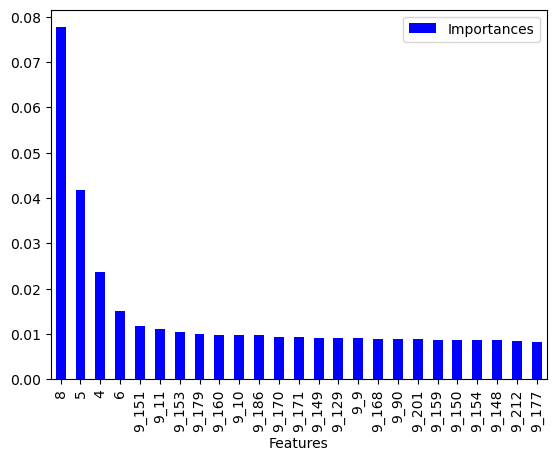

In [32]:
model = RandomForestClassifier(n_estimators=340)
model.fit(X, y)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances', ascending=False)

final_df.set_index("Features")[:25].plot.bar(color = 'blue')

Так же посмотрим на значимость признаков с помощью библиотеки GenericUnivariateSelect

In [33]:
selector = GenericUnivariateSelect(score_func=mutual_info_classif)
selector.fit(X, y)
pd.DataFrame(data={'score':selector.scores_}, 
             index=X.columns).sort_values(by='score', ascending=False)

,score
8,0.178729
4,0.089718
5,0.061028
6,0.030609
9_169,0.027541
...,...
2_40,0.000000
9_53,0.000000
2_43,0.000000
2_69,0.000000


Видим, что числовые признаки имеют высокую значимость, поэтому сгенерируем на их основе еще несколько переменных. При этом заметим, что особую значимость имеет признак 8 - omega - rpm of the machine (integer, the same for components of one example).

In [34]:
for col in number_fields:
    data[f'{col}_log'] = data[col].apply(lambda x: math.log10(x) if x>0 else -100)
    data[f'{col}_square'] = data[col].apply(lambda x: x**2)
    data[f'{col}_root'] = data[col].apply(lambda x: x**(1/2))
data.sample(5)

,0,1,4,5,6,8,10,categ_7,2_1,2_2,...,4_root,5_log,5_square,5_root,6_log,6_square,6_root,8_log,8_square,8_root
9004,1,6,0,0.70,0.0,1500,6,"[no filter, velocity, vertical]",0,0,...,0.000000,-0.154902,0.4900,0.836660,-100.000000,0.00,0.00000,3.176091,2250000,38.729833
8636,1,6,0,0.95,0.0,1500,6,"[no filter, velocity, horizontal]",0,0,...,0.000000,-0.022276,0.9025,0.974679,-100.000000,0.00,0.00000,3.176091,2250000,38.729833
5952,1,2,1500,0.90,0.7,1500,2,"[filter, velocity, horizontal]",0,0,...,38.729833,-0.045757,0.8100,0.948683,-0.154902,0.49,0.83666,3.176091,2250000,38.729833
5655,1,2,27000,2.10,0.0,3000,10,"[filter, velocity, horizontal]",0,0,...,164.316767,0.322219,4.4100,1.449138,-100.000000,0.00,0.00000,3.477121,9000000,54.772256
8423,1,6,4500,0.40,0.0,1500,6,"[filter, velocity, axial]",0,0,...,67.082039,-0.397940,0.1600,0.632456,-100.000000,0.00,0.00000,3.176091,2250000,38.729833


Приступаем к построению модели

После генерации признаков у нас их оказалось слишком много, поэтому снизим их количество с помощью метода главных компонент PCA и визуализируем два "ведущих" признака. Количество оставшихся признаков будем выбирать по критерию оставшейся информации в 90%, но не более 100.

В начале стандартизируем признаки

In [35]:
X_scaled = StandardScaler().fit_transform(X)
X_minmax_scaled = MinMaxScaler().fit_transform(X_scaled)

In [36]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FFFF0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            np.array(X)[y==l, 0],
            np.array(X)[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

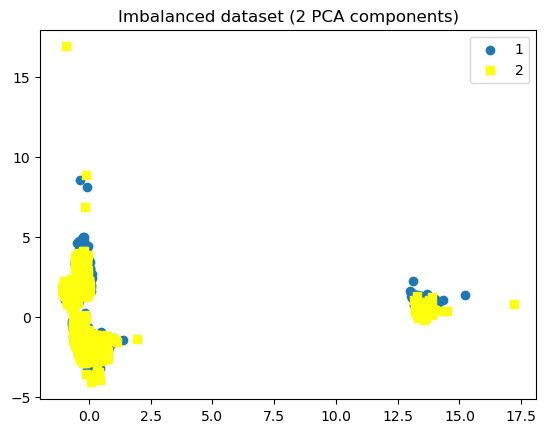

In [37]:
border = 0.9
pca_cmsm_vr = np.cumsum(PCA().fit(X_minmax_scaled).explained_variance_ratio_)
pca = PCA(n_components = pca_cmsm_vr.shape[0] - pca_cmsm_vr[pca_cmsm_vr>border].shape[0])
X_pca = pca.fit_transform(X_scaled)
plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

In [38]:
X_pca.shape

(9254, 159)

Видим, что признаков все равно осталось слишком много. Отберем 100 из них с помощью RandomForestClassifier.

In [39]:
X_prepr = dprcs.rfc_feature(pd.DataFrame(X_pca), y, count=100)
X_prepr

,3,16,17,18,19,20,21,24,25,27,...,147,148,149,150,151,153,154,155,156,157
0,-0.503586,0.109610,0.082578,0.088502,0.372665,0.060086,0.059473,0.194459,-0.196922,-0.271784,...,-0.159152,0.179397,-0.145383,-0.014117,0.002215,-0.310073,-0.317257,0.153245,-0.411413,-0.403378
1,-0.406286,0.072130,0.105183,-0.068642,0.346424,-0.110443,-0.140589,-0.001520,-0.023695,-0.004542,...,-0.152875,0.383016,0.105605,-0.001971,-0.259341,-0.197624,0.058305,0.005403,0.090633,0.176238
2,-1.430592,0.079315,0.023976,0.232673,0.175349,-0.001923,-0.116775,0.067598,-0.187238,-0.116591,...,0.038156,0.425739,-0.012668,-0.110418,0.277717,-0.287244,-0.092815,0.116052,-0.277244,-0.173201
3,-1.196266,-0.055114,0.312264,-0.301712,-0.021847,-0.215140,-0.211249,-0.018477,-0.384553,0.339999,...,-0.159861,-0.008962,0.840839,0.143262,-0.311559,-0.171942,0.304494,0.280416,-0.187618,-0.010933
4,-0.707137,-0.081643,-0.292050,-0.221843,-0.672711,-0.040907,-0.451292,-0.241133,-0.333568,0.063780,...,-0.057281,0.029976,0.421500,0.030409,0.080633,0.101548,-0.236378,0.125657,-0.016550,-0.057156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,-1.912084,-0.365356,0.515358,0.593521,-0.276584,-0.652947,0.284178,0.901643,0.398847,-1.333422,...,-2.127848,1.360473,-0.058826,0.542955,2.057539,-0.202298,-0.428187,0.278820,0.363901,-0.869268
9250,-1.936283,-0.558317,0.797123,1.133772,0.018491,0.325801,0.128967,0.164805,-1.087133,-0.580076,...,-1.526761,1.609824,-0.330204,0.776569,3.022873,-0.056555,-0.531918,0.153388,0.116181,-0.678719
9251,-1.721897,-0.913952,1.448968,0.731496,-0.087857,-0.087262,0.236815,0.631794,-1.077675,-0.242859,...,-0.761766,1.362141,-0.127849,-0.113438,2.152715,0.056396,-0.451494,-0.005310,0.524746,-0.688986
9252,-2.030501,-0.672712,1.075003,1.563981,0.043610,0.179274,0.124417,0.917626,-1.600533,-0.366043,...,-1.099746,2.103330,-0.415310,0.377181,1.529156,0.229391,-0.975296,0.505541,0.241272,-1.227942


Определим X и y.

In [40]:
X, y = X_prepr, y

In [41]:
y[y!=6], y[y==6] = 0, 1

Определим модели

In [42]:
class_weight = 'balanced'
models = {}
models['LogisticRegression'] = LogisticRegression(random_state=rnd, class_weight=class_weight)
# models['BernoulliNB'] = BernoulliNB()
models['DecisionTreeClassifier'] = DecisionTreeClassifier(random_state=rnd, class_weight=class_weight)
models['LinearSVC'] = LinearSVC(random_state=rnd, class_weight=class_weight)
# models['SVC'] = SVC(random_state=rnd, class_weight=class_weight)
models['KNeighborsClassifier'] = KNeighborsClassifier()
models['RandomForestClassifier'] = RandomForestClassifier(random_state=rnd, class_weight=class_weight)
models['SGDClassifier'] = SGDClassifier(random_state=rnd, class_weight=class_weight)
models['RidgeClassifier'] = RidgeClassifier(random_state=rnd, class_weight=class_weight)
# models['GradientBoostingClassifier'] = GradientBoostingClassifier(random_state=rnd)
models['AdaBoostClassifier'] = AdaBoostClassifier(random_state=rnd)
# models['CatBoostClassifier'] = CatBoostClassifier(random_state=rnd, verbose=False)
# models['XGBClassifier'] = XGBClassifier(random_state=rnd)
models['LGBMClassifier'] = LGBMClassifier(is_unbalance=True)
# models['MLPClassifier'] = MLPClassifier(
#     hidden_layer_sizes=(20,10),
#     validation_fraction=0.1,
#     batch_size=1000,
#     max_iter=1000,
#     early_stopping=True,
#     n_iter_no_change= 100,
#     verbose=False)

Проверим качество моделей в цикле. 
По условию нужно использовать 5-кратную перекрестную проверку, поэтому параметр cv=5. Требуемая метрика - "roc_auc".

In [43]:
results = list()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=rnd)
for name in models:
    start_time = time.time()
    try:
        res = cross_val_score(model, X, y, cv=5, scoring="roc_auc", error_score="raise", n_jobs=-1)
        y_pred = model.fit(X_train, y_train).predict(X_test)
        metr = metrics.roc_auc_score(y_pred, y_test)
        results.append((name, model, res.mean(), metr, time.time() - start_time))
    except Exception as e: print(e)

In [44]:
results

[('LogisticRegression',
  RandomForestClassifier(n_estimators=340),
  0.7837333602732623,
  1.0,
  52.57615542411804),
 ('DecisionTreeClassifier',
  RandomForestClassifier(n_estimators=340),
  0.7894716500762361,
  1.0,
  44.05867147445679),
 ('LinearSVC',
  RandomForestClassifier(n_estimators=340),
  0.8055557686820454,
  1.0,
  45.601279497146606),
 ('KNeighborsClassifier',
  RandomForestClassifier(n_estimators=340),
  0.7952748453293994,
  1.0,
  60.48678541183472),
 ('RandomForestClassifier',
  RandomForestClassifier(n_estimators=340),
  0.8106291113698884,
  1.0,
  56.74501132965088),
 ('SGDClassifier',
  RandomForestClassifier(n_estimators=340),
  0.7915393963210937,
  1.0,
  64.82052969932556),
 ('RidgeClassifier',
  RandomForestClassifier(n_estimators=340),
  0.8087617584570156,
  1.0,
  46.05099105834961),
 ('AdaBoostClassifier',
  RandomForestClassifier(n_estimators=340),
  0.7936181291585854,
  1.0,
  44.26867461204529),
 ('LGBMClassifier',
  RandomForestClassifier(n_estimat

In [45]:
results = clsf.test_classification_models(X, y, metric="roc_auc", test_size=0.25, folds=5)

In [46]:
sorted(results, key=lambda x:-x[2])[:7]

[('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.7099076104798672,
  1.0,
  8.487155675888062),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.6082384839345207,
  1.0,
  8.374951124191284),
 ('AdaBoostClassifier',
  AdaBoostClassifier(random_state=71),
  0.6055937339919139,
  0.9755784778366322,
  13.679773807525635),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight='balanced', random_state=71),
  0.5987693605250002,
  0.9680600008406843,
  1.1687593460083008),
 ('KNeighborsClassifier',
  KNeighborsClassifier(),
  0.5806486831268225,
  1.0,
  1.561671495437622),
 ('LogisticRegression',
  LogisticRegression(class_weight='balanced', random_state=71),
  0.4707978761228331,
  0.8881432732765131,
  0.7947564125061035),
 ('SGDClassifier',
  SGDClassifier(class_weight='balanced', random_state=71),
  0.46406040434886486,
  0.8940799237264102,
  0.4936208724975586)]

На кросс-валидации результаты не очень хорошие, но на тестовой выборке они намного лучше

##### Проверим результат на отдельном датасете

В качестве целевого будем использовать поле '1' - class - classification (1..6, the same for components of one example)

In [47]:
data = dst.dataset_open()
file_name = 'mechanical-analysis.notused-instances.txt'
dst.dataset_prepare(file_name)
df = dst.dataset_open(file_name)
df

Отсутствие класса: {32, 33, 66, 194, 69, 167, 8, 203, 12, 208, 152} 523


,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,4,0,7.00,0.0,ao,1500,8,NaN,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
1,1,1,1,4,0,21.50,0.0,aa,1500,8,NaN,"['no filter', 'amplitude', 'axial']",no filter,amplitude,axial
2,1,1,2,4,0,1.95,0.0,vo,1500,8,NaN,"['no filter', 'velocity', 'horizontal']",no filter,velocity,horizontal
3,1,1,3,4,0,3.80,0.0,va,1500,8,NaN,"['no filter', 'velocity', 'axial']",no filter,velocity,axial
4,1,1,4,3,0,9.00,0.0,ao,1500,8,NaN,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1,6,51,3,12500,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
557,1,6,52,3,16000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
558,1,6,53,3,18000,0.30,0.0,io,3000,208,NaN,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
559,1,6,54,3,18000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical


Объединим датафреймы

In [48]:
unite_data = pd.concat([data, df], axis=0)

In [49]:
unite_data

,0,1,2,3,4,5,6,7,8,9,10,categ_7,categ_7_1,categ_7_2,categ_7_3
0,1,1,0,3,0,120.00,21.0,ao,1000,1,7,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
1,1,1,1,3,0,55.00,7.5,aa,1000,1,7,"['no filter', 'amplitude', 'axial']",no filter,amplitude,axial
2,1,1,2,3,0,26.00,1.4,vo,1000,1,7,"['no filter', 'velocity', 'horizontal']",no filter,velocity,horizontal
3,1,1,3,3,0,11.00,0.8,va,1000,1,7,"['no filter', 'velocity', 'axial']",no filter,velocity,axial
4,1,1,4,2,0,7.00,5.5,ao,1000,1,7,"['no filter', 'amplitude', 'horizontal']",no filter,amplitude,horizontal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1,6,51,3,12500,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
557,1,6,52,3,16000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical
558,1,6,53,3,18000,0.30,0.0,io,3000,208,NaN,"['filter', 'velocity', 'horizontal']",filter,velocity,horizontal
559,1,6,54,3,18000,0.65,0.0,iv,3000,208,NaN,"['filter', 'velocity', 'vertical']",filter,velocity,vertical


In [50]:
X, y = dprcs.prepare_X_y(unite_data, target_field='1')

In [51]:
Counter(y)

Counter({0: 8709, 1: 1106})

Видим, что отклик не сбалансирован и нужно решать эту проблему

In [52]:
X, y = dprcs.preprocessing(X, y)

In [53]:
X_data, y_data = X[:len(data)], y[:len(data)]
X_df, y_df = X[len(data):], y[len(data):]

Запустим тот же самый алгоритм классификации. Еще раз здесь приводить не будем.

In [54]:
results = clsf.test_classification_models(X_data, y_data, metric='roc_auc')

Видим результаты тестирования:

In [55]:
results = sorted(results, key=lambda x:-x[3])
results[:7]

[('RandomForestClassifier',
  RandomForestClassifier(class_weight='balanced', random_state=71),
  0.7340139387680154,
  0.6971494046420885,
  6.847300052642822),
 ('KNeighborsClassifier',
  KNeighborsClassifier(),
  0.6533325802389764,
  0.6312400079936051,
  1.841442346572876),
 ('LinearSVC',
  LinearSVC(class_weight='balanced', random_state=71),
  0.7994519305760025,
  0.6168079186133656,
  1.801947832107544),
 ('SGDClassifier',
  SGDClassifier(class_weight='balanced', random_state=71),
  0.7728803791152874,
  0.6133316461060363,
  0.3198997974395752),
 ('RidgeClassifier',
  RidgeClassifier(class_weight='balanced', random_state=71),
  0.7929970207987695,
  0.6111763523141523,
  0.1915273666381836),
 ('LogisticRegression',
  LogisticRegression(class_weight='balanced', random_state=71),
  0.7957709076374924,
  0.6068162775640782,
  0.42880773544311523),
 ('LGBMClassifier',
  LGBMClassifier(is_unbalance=True),
  0.7640628300592083,
  0.6052791067980169,
  1.5413007736206055)]

Построим отчеты для моделей:

In [56]:
model = results[0][1]
print(model)
model.fit(X_data, y_data)

RandomForestClassifier(class_weight='balanced', random_state=71)


RandomForestClassifier(class_weight='balanced', random_state=71)

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8287
           1       1.00      1.00      1.00       967

    accuracy                           1.00      9254
   macro avg       1.00      1.00      1.00      9254
weighted avg       1.00      1.00      1.00      9254

precision_score 1.0
recall_score 0.9968976215098242
accuracy_score 0.9996758158634104
balanced_accuracy_score 0.9984488107549121
f1_score 0.9984464008285863
roc_auc_score 0.9984488107549121
cohen_kappa_score 0.9982654276781061

Confusion matrix
col_0     0    1
row_0           
0      8287    0
1         3  964

TEST REPORT
              precision    recall  f1-score   support

           0       0.09      0.98      0.16       422
           1       1.00      0.43      0.60      7742

    accuracy                           0.46      8164
   macro avg       0.54      0.71      0.38      8164
weighted avg       0.95      0.46      0.58      8164

precisi

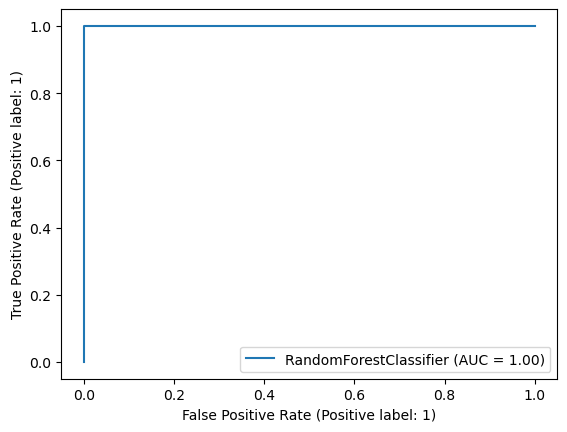

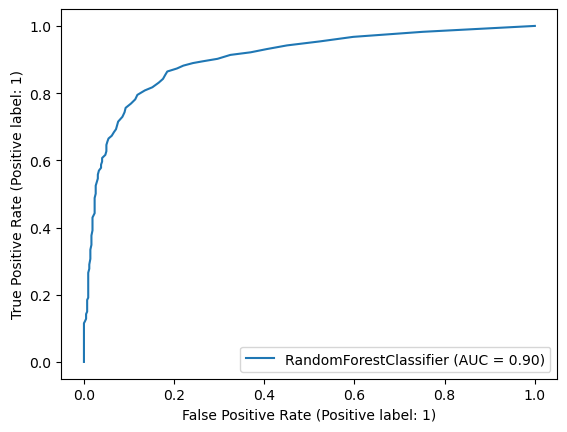

In [57]:
clsf.get_classification_report('TRAIN REPORT', model, X_data, y_data, model.predict(X_data))
print()
clsf.get_classification_report('TEST REPORT', model, X_df, y_df, model.predict(X_df))

Построим статистику для всех моделей

RandomForestClassifier(class_weight='balanced', random_state=71)
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8287
           1       1.00      1.00      1.00       967

    accuracy                           1.00      9254
   macro avg       1.00      1.00      1.00      9254
weighted avg       1.00      1.00      1.00      9254

precision_score 1.0
recall_score 0.9968976215098242
accuracy_score 0.9996758158634104
balanced_accuracy_score 0.9984488107549121
f1_score 0.9984464008285863
roc_auc_score 0.9984488107549121
cohen_kappa_score 0.9982654276781061

Confusion matrix
col_0     0    1
row_0           
0      8287    0
1         3  964

TEST REPORT
              precision    recall  f1-score   support

           0       0.09      0.98      0.16       422
           1       1.00      0.43      0.60      7742

    accuracy                           0.46      8164
   macro avg       0.54      0.71      0.38      81

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      8287
           1       0.48      0.98      0.64       967

    accuracy                           0.89      9254
   macro avg       0.74      0.93      0.79      9254
weighted avg       0.94      0.89      0.90      9254

precision_score 0.48067141403865715
recall_score 0.9772492244053774
accuracy_score 0.8872919818456884
balanced_accuracy_score 0.9270221022473369
f1_score 0.6443914081145584
roc_auc_score 0.9270221022473369
cohen_kappa_score 0.5864597109016391

Confusion matrix
col_0     0     1
row_0            
0      7266  1021
1        22   945

TEST REPORT
              precision    recall  f1-score   support

           0       0.13      0.88      0.22       422
           1       0.99      0.67      0.80      7742

    accuracy                           0.68      8164
   macro avg       0.56      0.77      0.51      8164
weighted avg       0.95      0.68      0.7

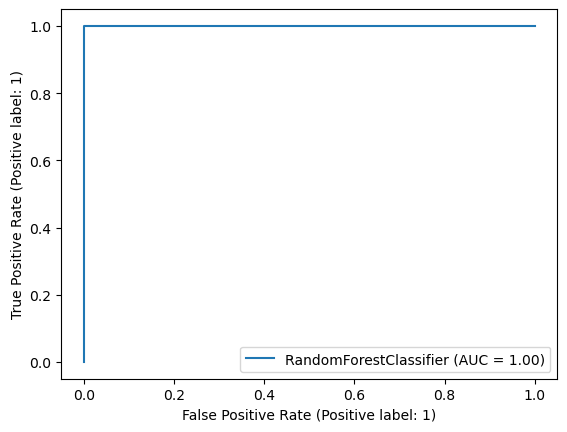

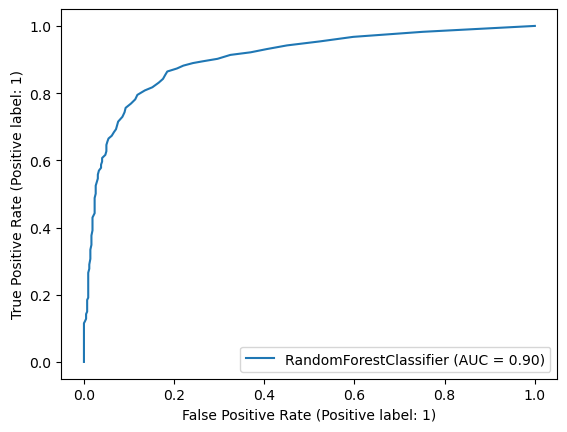

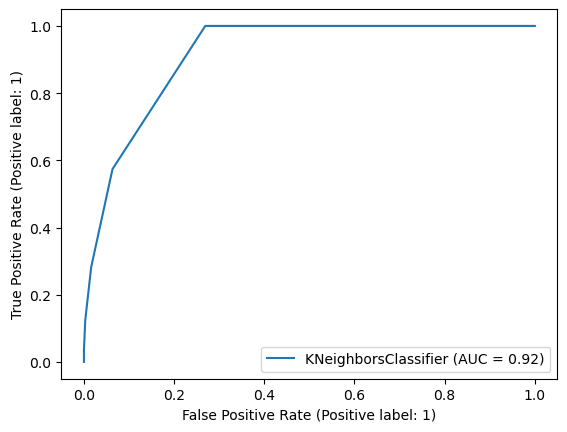

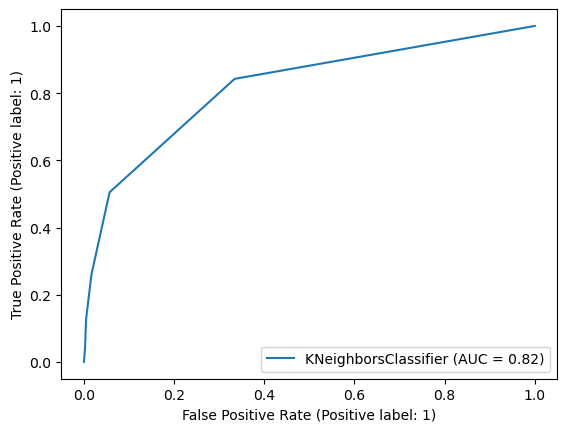

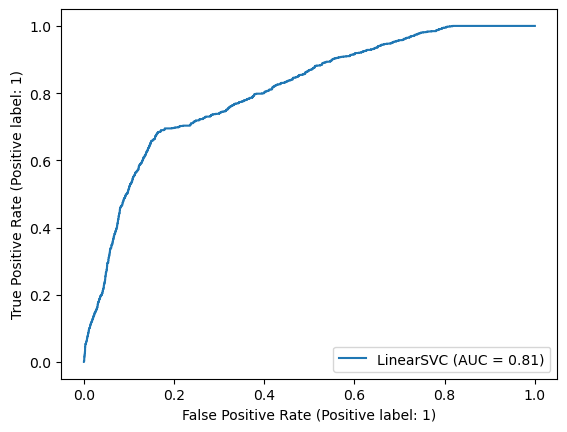

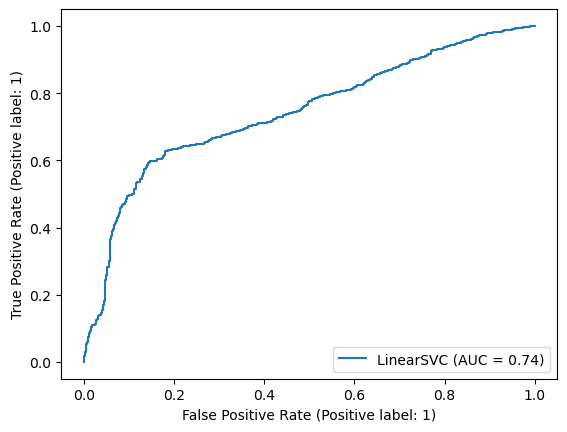

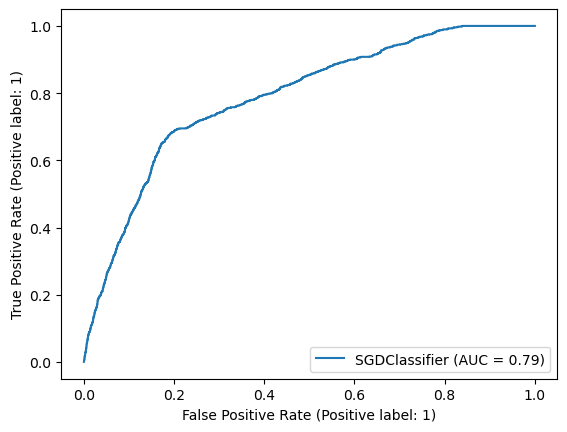

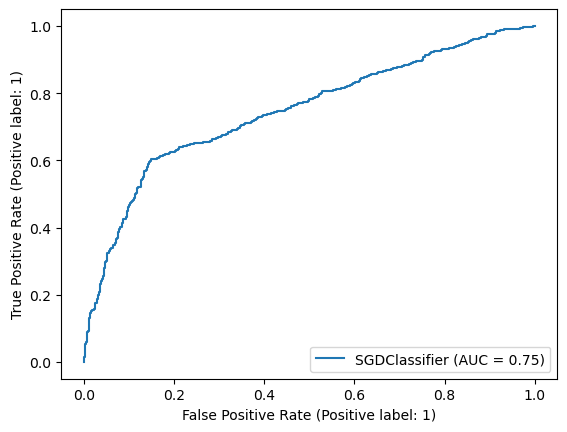

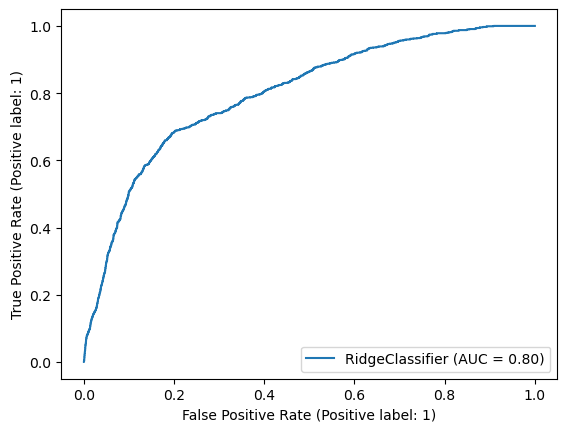

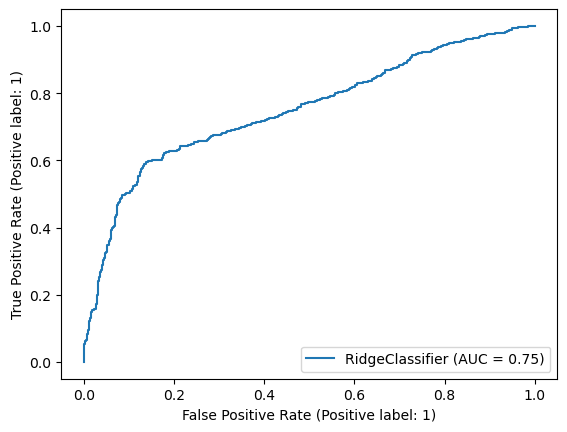

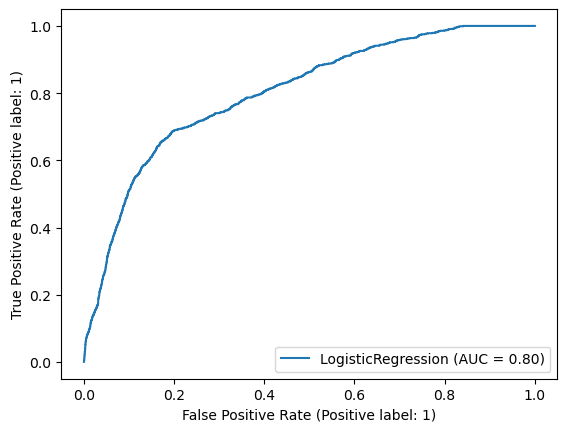

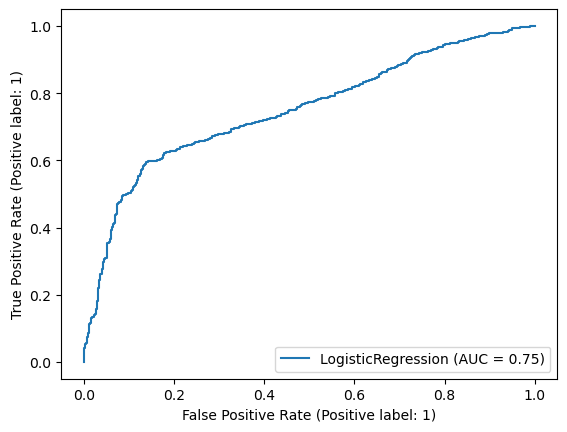

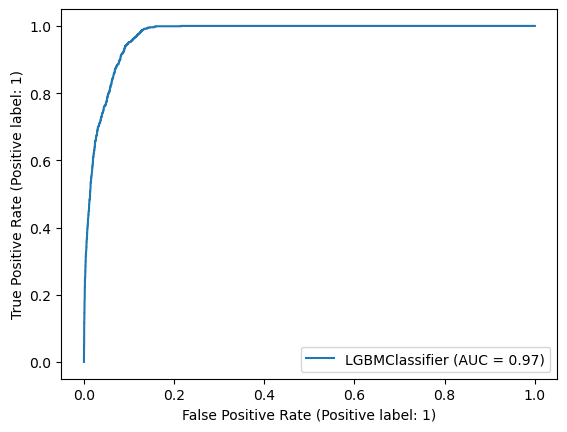

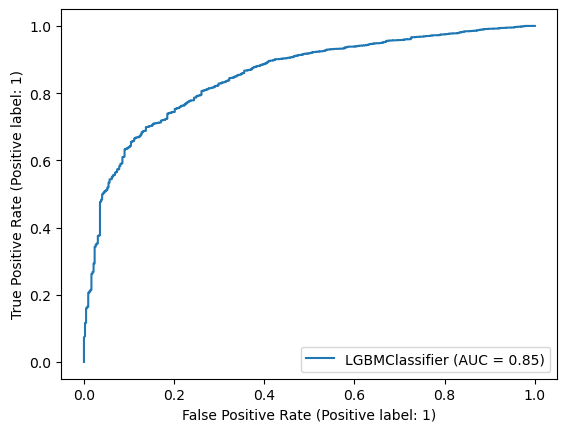

In [58]:
for i in range(7):
    model = results[i][1]
    print(model)
    model.fit(X_data, y_data)
    clsf.get_classification_report('TRAIN REPORT', model, X_data, y_data, model.predict(X_data))
    print()
    clsf.get_classification_report('TEST REPORT', model, X_df, y_df, model.predict(X_df))
    for _ in range(3):
        print()